In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as mno
#from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split

In [4]:
dataset=pd.read_csv(r'E:\Technocolabs\Dataset\data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,13,14,20,22,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,53,54,57,58,59,61,64,66,67,68,69,70,71,72,73,76,78,79,80,82,85,87,88,89,90,91,92,93,94,97,98,99,100,101,103,106,108,109,110,111,112,113,114,115,121,122,124,127,129,130,131,132,133,134,135,136,142,143,145,148,150,151,152,153,154,155,156,157,160,162,163,164,166,169,171,172,173,174,175,176,177,178,184,185,187,190,192,193,194,195,196,197,198,199,205,206,208,211,213,214,215,216,217,218,219,220,223,225,226,227,229,232,234,235,236,237,238,239,240,244,246,247,248,250,253,257,258,259) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
dataset.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,08-04-2016,30-04-2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,Nov-11,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,14-07-2017,13-05-2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),Nov-11,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,23-08-2017,30-04-2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,Nov-11,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,22-12-2017,20-08-2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,Nov-11,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,10-01-2018,15-04-2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",Nov-11,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.shape

(664616, 260)

In [7]:
dataset.drop(dataset[dataset['VISA_CLASS'] == 'E-3 Australian'].index, inplace = True)
dataset.drop(dataset[dataset['VISA_CLASS'] == 'H-1B1 Singapore'].index, inplace = True)
dataset.drop(dataset[dataset['VISA_CLASS'] == 'H-1B1 Chile'].index, inplace = True)
dataset.drop(dataset[dataset['VISA_CLASS'] == 'nan'].index, inplace = True)

In [8]:
dataset.shape

(649083, 260)

In [9]:
dataset.describe()

,TOTAL_WORKER_POSITIONS,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,NAICS_CODE,WORKSITE_WORKERS_1,PREVAILING_WAGE_1,PW_OES_YEAR_1,PW_NON-OES_YEAR_1,...,PW_NON-OES_YEAR_9,PW_SURVEY_PUBLISHER_9,WORKSITE_WORKERS_10,WORKSITE_POSTAL_CODE_10,WAGE_RATE_OF_PAY_FROM_10,WAGE_RATE_OF_PAY_TO_10,PREVAILING_WAGE_10,PW_OES_YEAR_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10
count,649081.000000,649083.000000,649082.000000,649083.000000,649083.000000,649081.000000,568352.000000,616606.000000,72405.000000,5.422580e+05,...,290.000000,63.000000,249.000000,249.000000,249.000000,87.000000,249.000000,52.000000,194.000000,52.000000
mean,1.616110,0.123349,0.013434,0.259089,0.227156,451982.393977,5.182023,84144.216488,2020.633824,2.035713e+03,...,2018.420690,2017.888889,2.678715,43719.132530,136585.080442,165922.504713,98629.426225,2017.980769,2018.417526,2017.980769
std,4.470281,0.917180,0.286389,1.120431,0.904593,189166.910045,494.548938,35481.544014,407.803120,1.185891e+04,...,0.547646,0.674683,5.572215,29026.586728,101802.213376,117556.218422,60775.054739,0.312509,0.544308,0.312509
min,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,7.250000,1.000000,1.000000e+00,...,2018.000000,2013.000000,1.000000,2115.000000,24.550000,31.480000,24.550000,2017.000000,2018.000000,2017.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,454111.000000,1.000000,68806.000000,2018.000000,2.018000e+03,...,2018.000000,2018.000000,1.000000,18510.000000,58224.000000,71789.000000,58067.190000,2018.000000,2018.000000,2018.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,541511.000000,1.000000,84240.000000,2018.000000,2.018000e+03,...,2018.000000,2018.000000,1.000000,40383.000000,94557.000000,140909.000000,73317.000000,2018.000000,2018.000000,2018.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,541512.000000,1.000000,102181.000000,2018.000000,2.019000e+03,...,2019.000000,2018.000000,1.000000,70380.000000,210000.000000,219816.500000,132129.000000,2018.000000,2019.000000,2018.000000
max,594.000000,338.000000,99.000000,99.000000,99.000000,928120.000000,160500.000000,849680.000000,72000.000000,8.731800e+06,...,2020.000000,2019.000000,45.000000,99218.000000,525000.000000,500000.000000,282235.000000,2019.000000,2020.000000,2019.000000


In [10]:
dataset['VISA_CLASS'].unique()

array(['H-1B'], dtype=object)

In [11]:
dataset.dtypes

CASE_NUMBER           object
CASE_STATUS           object
CASE_SUBMITTED        object
DECISION_DATE         object
ORIGINAL_CERT_DATE    object
                       ...  
WILLFUL_VIOLATOR      object
SUPPORT_H1B           object
STATUTORY_BASIS       object
MASTERS_EXEMPTION     object
PUBLIC_DISCLOSURE     object
Length: 260, dtype: object

In [12]:
dataset['CASE_STATUS'].unique()

array(['WITHDRAWN', 'CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [13]:
# dropping case status which aren't neede
dataset.drop(dataset[dataset['CASE_STATUS'] == 'CERTIFIED-WITHDRAWN'].index, inplace = True)
dataset.drop(dataset[dataset['CASE_STATUS'] == 'WITHDRAWN'].index, inplace = True)
dataset.drop(dataset[dataset['CASE_STATUS'] == 'Nan'].index, inplace = True)

In [14]:
dataset.shape

(583806, 260)

In [15]:
dataset['EMPLOYER_COUNTRY'].unique()

array(['UNITED STATES OF AMERICA', 'CANADA', 'TURKEY', 'INDIA',
       'GUATEMALA', 'AFGHANISTAN', 'ALBANIA', 'AUSTRALIA'], dtype=object)

In [16]:
dataset['EMPLOYER_COUNTRY'].value_counts()

UNITED STATES OF AMERICA    583774
CANADA                          23
INDIA                            3
GUATEMALA                        2
AFGHANISTAN                      1
ALBANIA                          1
AUSTRALIA                        1
TURKEY                           1
Name: EMPLOYER_COUNTRY, dtype: int64

In [17]:
#dropping all countries observation accept US
dataset.drop(dataset[dataset['EMPLOYER_COUNTRY'] == 'CANADA'].index, inplace = True)
dataset.drop(dataset[dataset['EMPLOYER_COUNTRY'] == 'INDIA'].index, inplace = True)
dataset.drop(dataset[dataset['EMPLOYER_COUNTRY'] == 'GUATEMALA'].index, inplace = True)
dataset.drop(dataset[dataset['EMPLOYER_COUNTRY'] == 'AFGHANISTAN'].index, inplace = True)
dataset.drop(dataset[dataset['EMPLOYER_COUNTRY'] == 'ALBANIA'].index, inplace = True)
dataset.drop(dataset[dataset['EMPLOYER_COUNTRY'] == 'AUSTRALIA'].index, inplace = True)
dataset.drop(dataset[dataset['EMPLOYER_COUNTRY'] == 'TURKEY'].index, inplace = True)

In [18]:
dataset['EMPLOYER_COUNTRY'].unique()

array(['UNITED STATES OF AMERICA'], dtype=object)

In [19]:
dataset['EMPLOYER_NAME'].unique()

array(['FANTUAN GROUP INC', 'TPUSA-FHCS', 'UNIVERSITY OF TEXAS AT DALLAS',
       ..., 'EVEREST CONSULTANTS, INC.',
       'EMBRAER EXECUTIVE AIRCRAFT, INC.',
       'PORT LOGISTICS TERMINAL OPERATIONS, LLC'], dtype=object)

In [20]:
dataset['AGENT_REPRESENTING_EMPLOYER'].unique()

array(['Y', 'N', nan], dtype=object)

In [139]:
dataset['JOB_TITLE'].unique()

array(['ADVERSTING AND PROMOTIONS MANAGER',
       'ADVERTISING AND PROMOTIONS DIRECTOR', 'PROGRAM MANAGER I', ...,
       'INSPECTOR V', 'CONTAINER MOBILE HARBOR CRANE OPERATOR',
       'DIGITAL TOUCHPOINTS ANALYST'], dtype=object)

In [140]:
dataset['SOC_CODE'].unique()

array(['11-2011', '11-2021', '11-2022', '11-2031', '15-1132', '15-1133',
       '17-2112', '27-1021', '29-1122', '11-3011', '11-3021', '11-3031',
       '11-3051', '11-3061', '11-3071', '11-3111', '11-3121', '11-3131',
       '11-9013', '11-9021', '11-9031', '11-9032', '11-9033', '11-9039',
       '11-9041', '11-9051', '11-9081', '11-9111', '11-9121', '11-9141',
       '11-9151', '11-9161', '11-9199', '11-1011', '11-1021',
       '11-3031.02', '11-3051.01', '11-3071.03', '11-9199.02',
       '11-9199.07', '13-1011', '13-1021', '13-1022', '13-1023',
       '13-1031', '13-1041', '13-1041.07', '13-1051', '13-1071',
       '13-1075', '13-1081', '13-1081.00', '13-1111', '13-1111.00',
       '13-1121', '13-1131', '13-1141', '13-1151', '13-1161',
       '13-1161.00', '13-1199', '13-2011', '13-2021', '13-2031',
       '13-2041', '13-2051', '13-2052', '13-2053', '13-2061', '13-2071',
       '13-2072', '13-2081', '13-2082', '13-2099', '13-2099.01',
       '13-2099.02', '15-1021.00', '15-1022', '

In [141]:
dataset.shape

(583774, 260)

In [142]:
#creating new dataset with selected features
dt2 = dataset[['CASE_STATUS','AGENT_REPRESENTING_EMPLOYER', 'VISA_CLASS', 'JOB_TITLE', 'FULL_TIME_POSITION', 'H-1B_DEPENDENT', 'EMPLOYER_NAME', 'SECONDARY_ENTITY_1', 'SOC_TITLE', 'SOC_CODE', 'NAICS_CODE', 'NEW_EMPLOYMENT','CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'WILLFUL_VIOLATOR', 'WAGE_RATE_OF_PAY_FROM_1','WAGE_RATE_OF_PAY_TO_1', 'WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS','PREVAILING_WAGE_1']]

In [143]:
dt2.head(2)

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
24,CERTIFIED,Y,H-1B,ADVERSTING AND PROMOTIONS MANAGER,N,N,FANTUAN GROUP INC,NaN,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,...,0,0.0,0,0,N,33.0,NaN,Hour,1.0,NaN
26,CERTIFIED,Y,H-1B,ADVERTISING AND PROMOTIONS DIRECTOR,Y,N,TPUSA-FHCS,NaN,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,...,0,0.0,1,0,N,99000.0,NaN,Year,1.0,NaN


In [144]:
dt2.shape

(583774, 23)

In [145]:
dt2.corr()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
NAICS_CODE,1.000000,-0.031092,-0.039871,-0.099762,-0.120590,-0.011274,-0.098721,-0.107934,-0.033778
CHANGE_PREVIOUS_EMPLOYMENT,-0.031092,1.000000,0.302504,0.412831,0.519099,0.016787,0.065069,0.503116,0.036325
NEW_CONCURRENT_EMPLOYMENT,-0.039871,0.302504,1.000000,0.236785,0.296907,-0.042419,-0.055373,0.376680,-0.048329
CHANGE_EMPLOYER,-0.099762,0.412831,0.236785,1.000000,0.524298,0.072389,0.117489,0.571710,0.096678
AMENDED_PETITION,-0.120590,0.519099,0.296907,0.524298,1.000000,0.020823,0.082926,0.599888,0.048937
WAGE_RATE_OF_PAY_FROM_1,-0.011274,0.016787,-0.042419,0.072389,0.020823,1.000000,0.883984,0.011307,0.873799
WAGE_RATE_OF_PAY_TO_1,-0.098721,0.065069,-0.055373,0.117489,0.082926,0.883984,1.000000,0.080552,0.820407
TOTAL_WORKER_POSITIONS,-0.107934,0.503116,0.376680,0.571710,0.599888,0.011307,0.080552,1.000000,0.043798
PREVAILING_WAGE_1,-0.033778,0.036325,-0.048329,0.096678,0.048937,0.873799,0.820407,0.043798,1.000000


In [146]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583774 entries, 24 to 664615
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  583774 non-null  object 
 1   AGENT_REPRESENTING_EMPLOYER  583769 non-null  object 
 2   VISA_CLASS                   583774 non-null  object 
 3   JOB_TITLE                    583774 non-null  object 
 4   FULL_TIME_POSITION           583774 non-null  object 
 5   H-1B_DEPENDENT               583754 non-null  object 
 6   EMPLOYER_NAME                583770 non-null  object 
 7   SECONDARY_ENTITY_1           534017 non-null  object 
 8   SOC_TITLE                    583770 non-null  object 
 9   SOC_CODE                     583770 non-null  object 
 10  NAICS_CODE                   583773 non-null  float64
 11  NEW_EMPLOYMENT               583774 non-null  object 
 12  CONTINUED_EMPLOYMENT         583774 non-null  object 
 13

In [147]:
#creating copy of newly formed dataset
dt=dt2.copy(deep=True)

In [148]:
#categorical columns
categorical_columns = dt.select_dtypes(exclude='number').columns.to_list()
categorical_columns

['CASE_STATUS',
 'AGENT_REPRESENTING_EMPLOYER',
 'VISA_CLASS',
 'JOB_TITLE',
 'FULL_TIME_POSITION',
 'H-1B_DEPENDENT',
 'EMPLOYER_NAME',
 'SECONDARY_ENTITY_1',
 'SOC_TITLE',
 'SOC_CODE',
 'NEW_EMPLOYMENT',
 'CONTINUED_EMPLOYMENT',
 'WILLFUL_VIOLATOR',
 'WAGE_UNIT_OF_PAY_1']

In [149]:
#numerical columns
numerical_columns = dt.select_dtypes(include='number').columns.to_list()
numerical_columns

['NAICS_CODE',
 'CHANGE_PREVIOUS_EMPLOYMENT',
 'NEW_CONCURRENT_EMPLOYMENT',
 'CHANGE_EMPLOYER',
 'AMENDED_PETITION',
 'WAGE_RATE_OF_PAY_FROM_1',
 'WAGE_RATE_OF_PAY_TO_1',
 'TOTAL_WORKER_POSITIONS',
 'PREVAILING_WAGE_1']

In [150]:
dt.describe()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
count,583773.000000,583774.000000,583773.000000,583774.000000,583774.000000,5.837700e+05,2.983920e+05,583773.00000,579096.000000
mean,450698.719992,0.124817,0.014567,0.273578,0.237976,9.373856e+04,1.074479e+05,1.67165,84333.091448
std,189637.468307,0.951379,0.300407,1.169986,0.939539,4.568342e+04,5.211537e+04,4.67763,35378.043800
min,31.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+00,0.000000e+00,1.00000,7.250000
25%,454111.000000,0.000000,0.000000,0.000000,0.000000,7.381900e+04,8.130000e+04,1.00000,69285.000000
50%,541511.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+04,1.000000e+05,1.00000,84240.000000
75%,541512.000000,0.000000,0.000000,0.000000,0.000000,1.133810e+05,1.300000e+05,1.00000,102386.000000
max,928120.000000,338.000000,99.000000,99.000000,99.000000,1.870000e+06,3.000000e+06,594.00000,849680.000000


In [151]:
dt.isnull().sum()

CASE_STATUS                         0
AGENT_REPRESENTING_EMPLOYER         5
VISA_CLASS                          0
JOB_TITLE                           0
FULL_TIME_POSITION                  0
H-1B_DEPENDENT                     20
EMPLOYER_NAME                       4
SECONDARY_ENTITY_1              49757
SOC_TITLE                           4
SOC_CODE                            4
NAICS_CODE                          1
NEW_EMPLOYMENT                      0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           1
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
WILLFUL_VIOLATOR                   20
WAGE_RATE_OF_PAY_FROM_1             4
WAGE_RATE_OF_PAY_TO_1          285382
WAGE_UNIT_OF_PAY_1                  4
TOTAL_WORKER_POSITIONS              1
PREVAILING_WAGE_1                4678
dtype: int64

<AxesSubplot:title={'center':'H1B Petitions by Case Status'}>

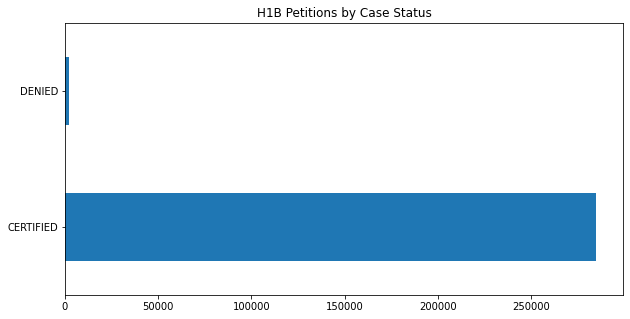

In [219]:
%matplotlib inline
#import ggplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
dt['CASE_STATUS'].value_counts().plot(kind='barh',title='H1B Petitions by Case Status')

c:\Users\Mayurdhvajsinh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WAGE_RATE_OF_PAY_FROM_1'>

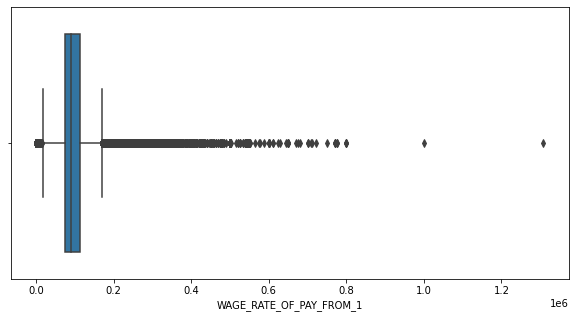

In [225]:
sns.boxplot(dt['WAGE_RATE_OF_PAY_FROM_1'])

c:\Users\Mayurdhvajsinh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WAGE_RATE_OF_PAY_FROM_1'>

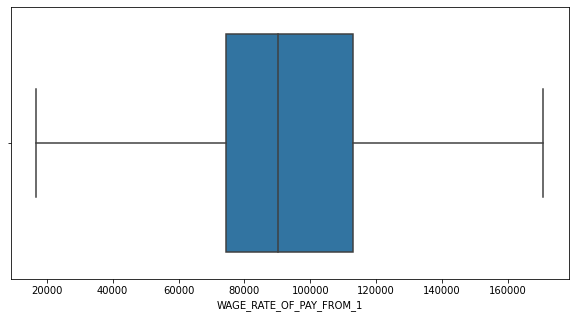

In [226]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lr = Q1 - (1.5 * IQR)
    ur = Q3 + (1.5 * IQR)
    return lr, ur

lessVis, moreVis = remove_outlier(dt['WAGE_RATE_OF_PAY_FROM_1'])
dt['WAGE_RATE_OF_PAY_FROM_1'] = np.where(dt['WAGE_RATE_OF_PAY_FROM_1']>moreVis,moreVis,dt['WAGE_RATE_OF_PAY_FROM_1'])
dt['WAGE_RATE_OF_PAY_FROM_1'] = np.where(dt['WAGE_RATE_OF_PAY_FROM_1']<lessVis,lessVis,dt['WAGE_RATE_OF_PAY_FROM_1'])

sns.boxplot(dt['WAGE_RATE_OF_PAY_FROM_1'])

c:\Users\Mayurdhvajsinh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WAGE_RATE_OF_PAY_TO_1'>

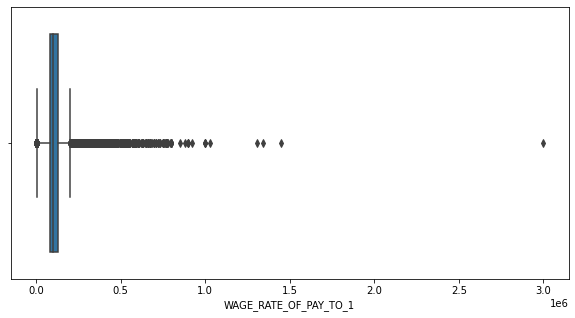

In [227]:
sns.boxplot(dt['WAGE_RATE_OF_PAY_TO_1'])

c:\Users\Mayurdhvajsinh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WAGE_RATE_OF_PAY_TO_1'>

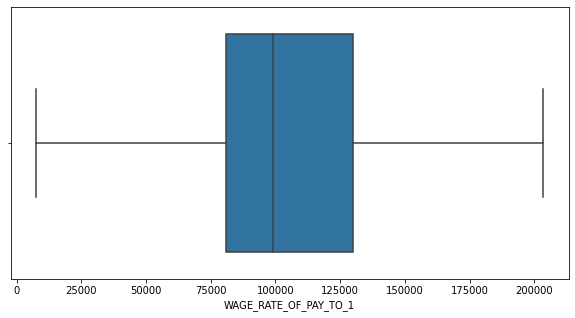

In [228]:
lessVis, moreVis = remove_outlier(dt['WAGE_RATE_OF_PAY_TO_1'])
dt['WAGE_RATE_OF_PAY_TO_1'] = np.where(dt['WAGE_RATE_OF_PAY_TO_1']>moreVis,moreVis,dt['WAGE_RATE_OF_PAY_TO_1'])
dt['WAGE_RATE_OF_PAY_TO_1'] = np.where(dt['WAGE_RATE_OF_PAY_TO_1']<lessVis,lessVis,dt['WAGE_RATE_OF_PAY_TO_1'])

sns.boxplot(dt['WAGE_RATE_OF_PAY_TO_1'])

c:\Users\Mayurdhvajsinh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PREVAILING_WAGE_1'>

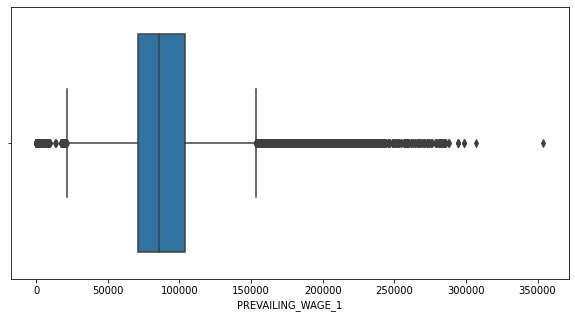

In [229]:
sns.boxplot(dt['PREVAILING_WAGE_1'])

c:\Users\Mayurdhvajsinh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PREVAILING_WAGE_1'>

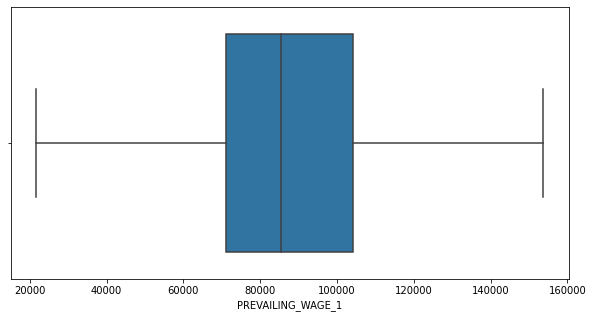

In [230]:
lessVis, moreVis = remove_outlier(dt['PREVAILING_WAGE_1'])
dt['PREVAILING_WAGE_1'] = np.where(dt['PREVAILING_WAGE_1']>moreVis,moreVis,dt['PREVAILING_WAGE_1'])
dt['PREVAILING_WAGE_1'] = np.where(dt['PREVAILING_WAGE_1']<lessVis,lessVis,dt['PREVAILING_WAGE_1'])

sns.boxplot(dt['PREVAILING_WAGE_1'])

<AxesSubplot:>

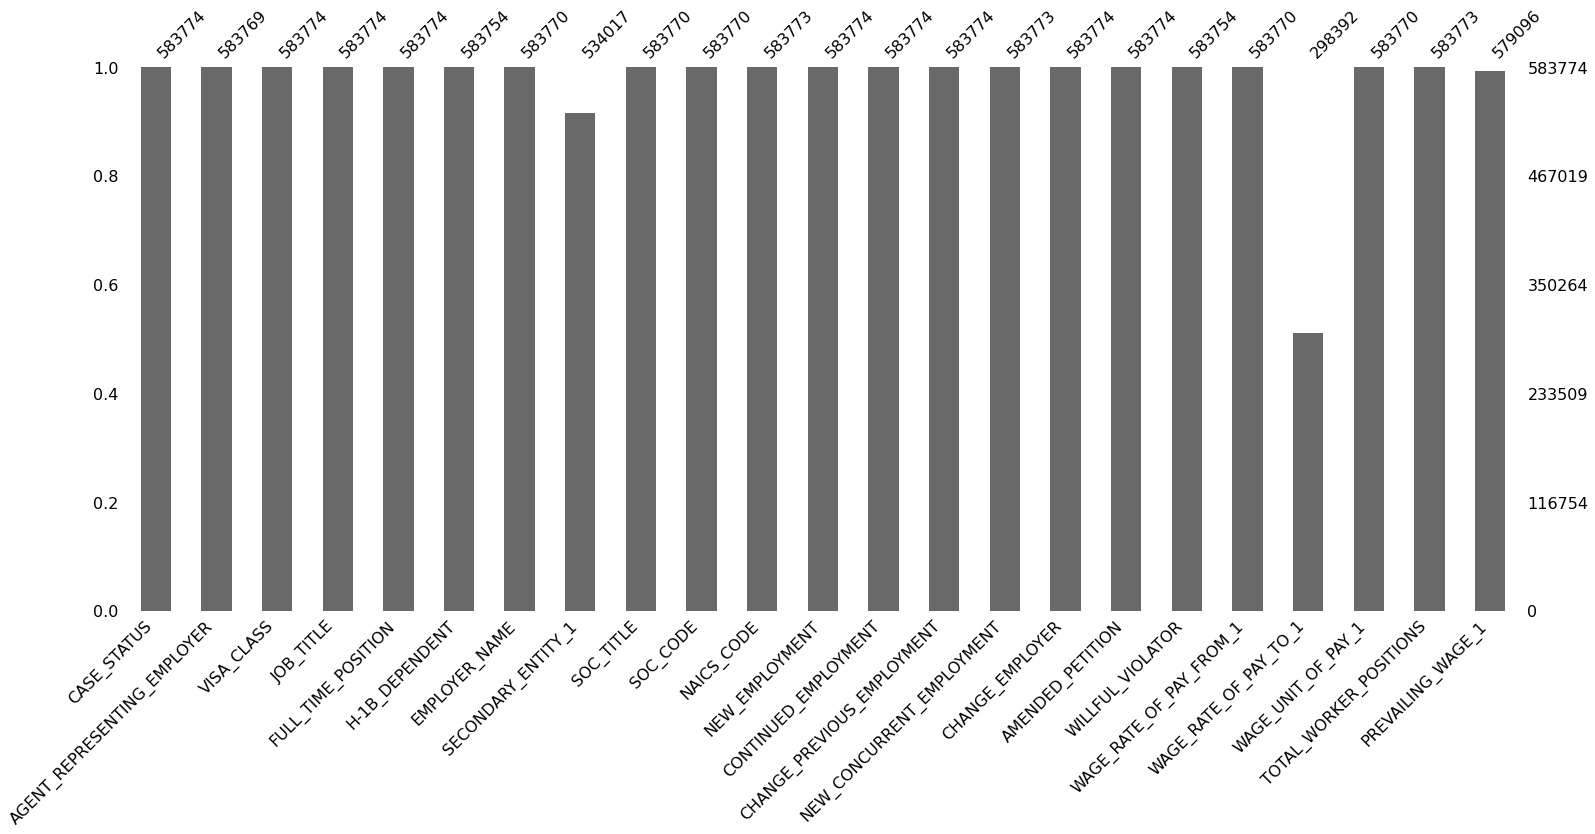

In [152]:
# Let's check if there is any trend in missing data
mno.bar(dt)

In [153]:
#dropping the enteries with missing values
dt.dropna(inplace=True)

In [154]:
dt.shape

(287351, 23)

In [155]:
dt.isnull().sum()

CASE_STATUS                    0
AGENT_REPRESENTING_EMPLOYER    0
VISA_CLASS                     0
JOB_TITLE                      0
FULL_TIME_POSITION             0
H-1B_DEPENDENT                 0
EMPLOYER_NAME                  0
SECONDARY_ENTITY_1             0
SOC_TITLE                      0
SOC_CODE                       0
NAICS_CODE                     0
NEW_EMPLOYMENT                 0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
WILLFUL_VIOLATOR               0
WAGE_RATE_OF_PAY_FROM_1        0
WAGE_RATE_OF_PAY_TO_1          0
WAGE_UNIT_OF_PAY_1             0
TOTAL_WORKER_POSITIONS         0
PREVAILING_WAGE_1              0
dtype: int64

In [156]:
dt.dtypes

CASE_STATUS                     object
AGENT_REPRESENTING_EMPLOYER     object
VISA_CLASS                      object
JOB_TITLE                       object
FULL_TIME_POSITION              object
H-1B_DEPENDENT                  object
EMPLOYER_NAME                   object
SECONDARY_ENTITY_1              object
SOC_TITLE                       object
SOC_CODE                        object
NAICS_CODE                     float64
NEW_EMPLOYMENT                  object
CONTINUED_EMPLOYMENT            object
CHANGE_PREVIOUS_EMPLOYMENT       int64
NEW_CONCURRENT_EMPLOYMENT      float64
CHANGE_EMPLOYER                  int64
AMENDED_PETITION                 int64
WILLFUL_VIOLATOR                object
WAGE_RATE_OF_PAY_FROM_1        float64
WAGE_RATE_OF_PAY_TO_1          float64
WAGE_UNIT_OF_PAY_1              object
TOTAL_WORKER_POSITIONS         float64
PREVAILING_WAGE_1              float64
dtype: object

## Performing Binary Encoding 
AGENT_REPRESENTING_EMPLOYER,FULL_TIME_POSITION,H-1B_DEPENDENT,SECONDARY_ENTITY_1,WILLFUL_VIOLATOR

In [157]:
# #AGENT_REPRESENTING_EMPLOYER
be=BinaryEncoder()
be_enc=be.fit_transform(dt['AGENT_REPRESENTING_EMPLOYER'])
dt=pd.concat([dt,be_enc],axis=1)
dt.sample(frac=1).head()

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,CHANGE_EMPLOYER,AMENDED_PETITION,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_0,AGENT_REPRESENTING_EMPLOYER_1
638954,CERTIFIED,Y,H-1B,GRAPHIC DESIGNER,Y,N,LOS ANGELES SA RANG COMMUNITY CHURCH,N,GRAPHIC DESIGNERS,27-1024,...,0,0,N,34382.0,34800.0,Year,1.0,34382.0,0,1
173865,CERTIFIED,Y,H-1B,DEVELOPER,Y,Y,TATA CONSULTANCY SERVICES LIMITED,Y,COMPUTER PROGRAMMERS,15-1131,...,0,0,N,85883.0,97000.0,Year,1.0,85883.0,0,1
268274,CERTIFIED,Y,H-1B,SOFTWARE ENGINEER,Y,Y,"C3 IOT, INC.",N,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,0,0,N,100000.0,110000.0,Year,1.0,94557.0,0,1
511564,CERTIFIED,Y,H-1B,ANALYST-TESTING,Y,Y,TATA CONSULTANCY SERVICES LIMITED,Y,"COMPUTER OCCUPATIONS, ALL OTHER",15-1199,...,0,0,N,67725.0,97800.0,Year,1.0,67725.0,0,1
280523,CERTIFIED,Y,H-1B,SOFTWARE ENGINEER,Y,N,RYZLINK CORP.,N,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,0,0,N,109242.0,109242.0,Year,1.0,109242.0,0,1


In [158]:
# #FULL_TIME_POSITION
be1=BinaryEncoder()
be_enc1=be1.fit_transform(dt['FULL_TIME_POSITION'])
dt=pd.concat([dt,be_enc1],axis=1)
dt.sample(frac=1).head()

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_0,AGENT_REPRESENTING_EMPLOYER_1,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1
93731,CERTIFIED,Y,H-1B,COMPUTER SYSTEMS ANALYSTS,Y,N,ERNST & YOUNG U.S. LLP,Y,COMPUTER SYSTEMS ANALYSTS,15-1121,...,N,81162.0,110000.0,Year,1.0,81162.00,0,1,0,1
341951,CERTIFIED,Y,H-1B,SYSTEMS ENGINEER IV,Y,Y,"ERP ANALYSTS, INC",N,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,N,116522.0,116522.0,Year,1.0,116522.00,0,1,0,1
21090,CERTIFIED,Y,H-1B,ENGINEERING DIVISION MANAGER,Y,N,"BOBRICK WASHROOM EQUIPMENT, INC.",N,ARCHITECTURAL AND ENGINEERING MANAGERS,11-9041,...,N,189900.0,189900.0,Year,1.0,104978.00,0,1,0,1
556271,CERTIFIED,N,H-1B,PRODUCT DEVELOPMENT ENGINEER,Y,Y,DIGITAL SCRIPTS INC,Y,ELECTRICAL ENGINEERS,17-2071,...,N,38.0,38.0,Hour,1.0,36.51,1,0,0,1
421303,CERTIFIED,N,H-1B,SENIOR ORACLE DEVELOPER,Y,Y,"XTGLOBAL, INC.,",Y,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",15-1133,...,N,107494.0,107494.0,Year,1.0,107494.00,1,0,0,1


In [159]:
# #H-1B_DEPENDENT
be2=BinaryEncoder()
be_enc2=be2.fit_transform(dt['H-1B_DEPENDENT'])
dt=pd.concat([dt,be_enc2],axis=1)
dt.sample(frac=1).head()

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_0,AGENT_REPRESENTING_EMPLOYER_1,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1,H-1B_DEPENDENT_0,H-1B_DEPENDENT_1
151033,CERTIFIED,Y,H-1B,SPECIALIST-TECHNOLOGY/COMPUTER SYSTEMS ANALYST,Y,Y,"SYNECHRON, INC.",Y,COMPUTER SYSTEMS ANALYSTS,15-1121,...,89175.0,Year,1.0,79206.0,0,1,0,1,1,0
256246,CERTIFIED,Y,H-1B,VICE PRESIDENT; PROGRAMMER PROF MKTS,Y,N,MERRILL LYNCH,N,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,152000.0,Year,1.0,138861.0,0,1,0,1,0,1
383559,CERTIFIED,N,H-1B,SENIOR SOFTWARE DEVELOPER,Y,Y,"MASTECH DIGITAL TECHNOLOGIES, INC., A MASTECH ...",Y,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,117773.0,Year,6.0,102773.0,1,0,0,1,1,0
8729,CERTIFIED,N,H-1B,TECHNICAL ARCHITECT/SENIOR DATA SCIENTIST,Y,Y,"INFOSHARE SYSTEMS, INC.",N,COMPUTER AND INFORMATION SYSTEMS MANAGERS,11-3021,...,110000.0,Year,1.0,104478.0,1,0,0,1,1,0
82270,CERTIFIED,Y,H-1B,"3D MODELING SOFTWARE DEVELOPMENT, DIRECTOR",Y,N,SPATIAL CORP.,N,COMPUTER AND INFORMATION RESEARCH SCIENTISTS,15-1111,...,150062.0,Year,1.0,109117.0,0,1,0,1,0,1


In [160]:
# #SECONDARY_ENTITY_1
be3=BinaryEncoder()
be_enc3=be3.fit_transform(dt['SECONDARY_ENTITY_1'])
dt=pd.concat([dt,be_enc3],axis=1)
dt.sample(frac=1).head()


,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_0,AGENT_REPRESENTING_EMPLOYER_1,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1,H-1B_DEPENDENT_0,H-1B_DEPENDENT_1,SECONDARY_ENTITY_1_0,SECONDARY_ENTITY_1_1
37044,CERTIFIED,Y,H-1B,ASSISTANT MANAGER,Y,N,"EXLSERVICE.COM, LLC",N,MANAGEMENT ANALYSTS,13-1111,...,5.0,87506.0,0,1,0,1,0,1,0,1
279494,CERTIFIED,Y,H-1B,PEOPLESOFT SENIOR DEVELOPER,Y,Y,"ERP ANALYSTS, INC.",Y,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,1.0,122283.0,0,1,0,1,1,0,1,0
346626,CERTIFIED,Y,H-1B,BUSINESS ANALYST,Y,N,"TIMESQUARE IT, INC.",N,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,1.0,84240.0,0,1,0,1,0,1,0,1
591706,CERTIFIED,Y,H-1B,"SCIENTIST II, NDS",Y,N,"BOEHRINGER INGELHEIM PHARMACEUTICALS, INC.",N,BIOCHEMISTS AND BIOPHYSICISTS,19-1021,...,1.0,55848.0,0,1,0,1,0,1,0,1
471221,CERTIFIED,Y,H-1B,MACHINE LEARNING OPERATIONS ENGINEER (15-1199.02),Y,N,WAYFAIR LLC,N,"COMPUTER OCCUPATIONS, ALL OTHER",15-1199,...,20.0,57637.0,0,1,0,1,0,1,0,1


In [161]:
# #WILLFUL_VIOLATOR
be4=BinaryEncoder()
be_enc4=be4.fit_transform(dt['WILLFUL_VIOLATOR'])
dt=pd.concat([dt,be_enc4],axis=1)
dt.sample(frac=1).head()

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,AGENT_REPRESENTING_EMPLOYER_0,AGENT_REPRESENTING_EMPLOYER_1,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1,H-1B_DEPENDENT_0,H-1B_DEPENDENT_1,SECONDARY_ENTITY_1_0,SECONDARY_ENTITY_1_1,WILLFUL_VIOLATOR_0,WILLFUL_VIOLATOR_1
263990,CERTIFIED,Y,H-1B,SOFTWARE ENGINEER,Y,N,"GOVERNMENT SCIENTIFIC SOURCE, INC.",N,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,0,1,0,1,0,1,0,1,0,1
546194,CERTIFIED,Y,H-1B,FIRE SAFETY SPECIALIST,Y,N,"HOLMES FIRE, L.P.",N,CIVIL ENGINEERS,17-2051,...,0,1,0,1,0,1,0,1,0,1
547329,CERTIFIED,Y,H-1B,HARDWARE ENGINEER,Y,Y,L&T TECHNOLOGY SERVICES LIMITED,Y,COMPUTER HARDWARE ENGINEERS,17-2061,...,0,1,0,1,1,0,1,0,0,1
282733,CERTIFIED,Y,H-1B,PEGA DEVELOPER,Y,Y,MANASI INFORMATION TECHNOLOGIES INC,N,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,0,1,0,1,1,0,0,1,0,1
624109,CERTIFIED,N,H-1B,ASSISTANT PROFESSOR,Y,N,UNIVERSITY OF PITTSBURGH,N,"ECONOMICS TEACHERS, POSTSECONDARY",25-1063,...,1,0,0,1,0,1,0,1,0,1


In [162]:
#dropping columns which have performed binary encoding
dt = dt.drop(['AGENT_REPRESENTING_EMPLOYER','VISA_CLASS','FULL_TIME_POSITION','H-1B_DEPENDENT','SECONDARY_ENTITY_1','WILLFUL_VIOLATOR'], axis=1)

In [163]:
# #dropping columns
dt = dt.drop(['AGENT_REPRESENTING_EMPLOYER_0'], axis=1)
dt = dt.drop(['FULL_TIME_POSITION_0'], axis=1)
dt = dt.drop(['H-1B_DEPENDENT_0'], axis=1)
dt = dt.drop(['SECONDARY_ENTITY_1_0'], axis=1)
dt = dt.drop(['WILLFUL_VIOLATOR_0'], axis=1)
dt.head(2)

,CASE_STATUS,JOB_TITLE,EMPLOYER_NAME,SOC_TITLE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,...,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_1,FULL_TIME_POSITION_1,H-1B_DEPENDENT_1,SECONDARY_ENTITY_1_1,WILLFUL_VIOLATOR_1
72,CERTIFIED,ACD WRITING,APPLE INC.,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334111.0,0,1,0,0.0,...,154232.00,225400.00,Year,1.0,154232.00,1,1,1,1,1
73,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGER,"TAOLA, INC.",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,516110.0,0,0,0,0.0,...,47.01,47.01,Hour,1.0,47.01,1,0,1,1,1


In [164]:
dt.dtypes

CASE_STATUS                       object
JOB_TITLE                         object
EMPLOYER_NAME                     object
SOC_TITLE                         object
SOC_CODE                          object
NAICS_CODE                       float64
NEW_EMPLOYMENT                    object
CONTINUED_EMPLOYMENT              object
CHANGE_PREVIOUS_EMPLOYMENT         int64
NEW_CONCURRENT_EMPLOYMENT        float64
CHANGE_EMPLOYER                    int64
AMENDED_PETITION                   int64
WAGE_RATE_OF_PAY_FROM_1          float64
WAGE_RATE_OF_PAY_TO_1            float64
WAGE_UNIT_OF_PAY_1                object
TOTAL_WORKER_POSITIONS           float64
PREVAILING_WAGE_1                float64
AGENT_REPRESENTING_EMPLOYER_1      int64
FULL_TIME_POSITION_1               int64
H-1B_DEPENDENT_1                   int64
SECONDARY_ENTITY_1_1               int64
WILLFUL_VIOLATOR_1                 int64
dtype: object

## Lets Perform Frequency Encoding On Rest Categorical Variables
JOB_TITLE, EMPLOYER_NAME,SOC_TITLE,SOC_CODE,
NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,WAGE_UNIT_OF_PAY_1

In [165]:
#performing frequency encoding on JOB_TITLE
col='JOB_TITLE'
#group by frequency
freq=dt.groupby(col).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col)]=dt[col].map(freq)

In [166]:
#performing frequency encoding on 'EMPLOYER_NAME'
col1='EMPLOYER_NAME'
#group by frequency
freq1=dt.groupby(col1).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col1)]=dt[col1].map(freq1)

In [167]:
#performing frequency encoding on 'SOC_TITLE'
col2='SOC_TITLE'
#group by frequency
freq2=dt.groupby(col2).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col2)]=dt[col2].map(freq2)

In [168]:
#performing frequency encoding on 'SOC_CODE'
col3='SOC_CODE'
#group by frequency
freq3=dt.groupby(col3).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col3)]=dt[col3].map(freq3)

In [169]:
#performing frequency encoding on 'NEW_EMPLOYMENT'
col4='NEW_EMPLOYMENT'
#group by frequency
freq4=dt.groupby(col4).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col4)]=dt[col4].map(freq4)

In [170]:
#performing frequency encoding on 'CONTINUED_EMPLOYMENT'
col5='CONTINUED_EMPLOYMENT'
#group by frequency
freq5=dt.groupby(col5).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col5)]=dt[col5].map(freq5)

In [171]:
#performing frequency encoding on 'WAGE_UNIT_OF_PAY_1'
col6='WAGE_UNIT_OF_PAY_1'
#group by frequency
freq6=dt.groupby(col6).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col6)]=dt[col6].map(freq6)

In [172]:
dt.head()

,CASE_STATUS,JOB_TITLE,EMPLOYER_NAME,SOC_TITLE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,...,H-1B_DEPENDENT_1,SECONDARY_ENTITY_1_1,WILLFUL_VIOLATOR_1,JOB_TITLE_freq,EMPLOYER_NAME_freq,SOC_TITLE_freq,SOC_CODE_freq,NEW_EMPLOYMENT_freq,CONTINUED_EMPLOYMENT_freq,WAGE_UNIT_OF_PAY_1_freq
72,CERTIFIED,ACD WRITING,APPLE INC.,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334111.0,0,1,0,0.0,...,1,1,1,0.000003,0.001712,0.000247,0.000251,0.542003,0.211431,0.941281
73,CERTIFIED,ADVERTISING AND PROMOTIONS MANAGER,"TAOLA, INC.",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,516110.0,0,0,0,0.0,...,1,1,1,0.000014,0.000003,0.000247,0.000251,0.542003,0.770312,0.058002
75,CERTIFIED,DIGITAL ADVERTISING MANAGER,"PROBOSCIS, INC.",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541512.0,0,0,0,0.0,...,1,1,1,0.000003,0.000003,0.000247,0.000251,0.542003,0.770312,0.941281
79,CERTIFIED,CREATIVE AGENCY PARTNER,"FACEBOOK, INC.",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,518112.0,0,0,1,0.0,...,0,1,1,0.000003,0.000929,0.000247,0.000251,0.542003,0.770312,0.941281
84,CERTIFIED,GLOBAL BRAND MANAGER,"SWI-DE, LLC",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,31222.0,0,0,0,0.0,...,1,1,1,0.000003,0.000003,0.000247,0.000251,0.542003,0.770312,0.941281


In [173]:
#dropping columns which have performed frequency encoding
dt =dt.drop(['JOB_TITLE','EMPLOYER_NAME','SOC_TITLE','SOC_CODE','NEW_EMPLOYMENT','CONTINUED_EMPLOYMENT','WAGE_UNIT_OF_PAY_1'], axis=1)

In [174]:
dt.dtypes

CASE_STATUS                       object
NAICS_CODE                       float64
CHANGE_PREVIOUS_EMPLOYMENT         int64
NEW_CONCURRENT_EMPLOYMENT        float64
CHANGE_EMPLOYER                    int64
AMENDED_PETITION                   int64
WAGE_RATE_OF_PAY_FROM_1          float64
WAGE_RATE_OF_PAY_TO_1            float64
TOTAL_WORKER_POSITIONS           float64
PREVAILING_WAGE_1                float64
AGENT_REPRESENTING_EMPLOYER_1      int64
FULL_TIME_POSITION_1               int64
H-1B_DEPENDENT_1                   int64
SECONDARY_ENTITY_1_1               int64
WILLFUL_VIOLATOR_1                 int64
JOB_TITLE_freq                   float64
EMPLOYER_NAME_freq               float64
SOC_TITLE_freq                   float64
SOC_CODE_freq                    float64
NEW_EMPLOYMENT_freq              float64
CONTINUED_EMPLOYMENT_freq        float64
WAGE_UNIT_OF_PAY_1_freq          float64
dtype: object

## Splitting The Dataset

In [190]:
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [191]:
#Independent Variables
x = dt.drop(['CASE_STATUS'], axis=1) 

In [192]:
# Dependent variables
y = dt['CASE_STATUS'] 

In [193]:
x.head()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_1,...,H-1B_DEPENDENT_1,SECONDARY_ENTITY_1_1,WILLFUL_VIOLATOR_1,JOB_TITLE_freq,EMPLOYER_NAME_freq,SOC_TITLE_freq,SOC_CODE_freq,NEW_EMPLOYMENT_freq,CONTINUED_EMPLOYMENT_freq,WAGE_UNIT_OF_PAY_1_freq
72,334111.0,0,0.0,0,0,154232.00,225400.00,1.0,154232.00,1,...,1,1,1,0.000003,0.001712,0.000247,0.000251,0.542003,0.211431,0.941281
73,516110.0,0,0.0,1,0,47.01,47.01,1.0,47.01,1,...,1,1,1,0.000014,0.000003,0.000247,0.000251,0.542003,0.770312,0.058002
75,541512.0,0,0.0,1,0,47549.00,47549.00,1.0,47549.00,1,...,1,1,1,0.000003,0.000003,0.000247,0.000251,0.542003,0.770312,0.941281
79,518112.0,1,0.0,0,0,214230.00,214230.00,1.0,156146.00,1,...,0,1,1,0.000003,0.000929,0.000247,0.000251,0.542003,0.770312,0.941281
84,31222.0,0,0.0,0,1,90000.00,110000.00,1.0,75026.00,1,...,1,1,1,0.000003,0.000003,0.000247,0.000251,0.542003,0.770312,0.941281


In [194]:
y.head()

72    CERTIFIED
73    CERTIFIED
75    CERTIFIED
79    CERTIFIED
84    CERTIFIED
Name: CASE_STATUS, dtype: object

In [195]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [197]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

## Naive Bayes

In [205]:
NBclassifier = BernoulliNB()
NBclassifier.fit(x_train,y_train)

BernoulliNB()

In [208]:
y_pred_NB = NBclassifier.predict(x_test) 

In [215]:
#confusion matrix
cmNB = confusion_matrix(y_test, y_pred_NB)
cmNB

array([[85418,    85],
       [  699,     4]], dtype=int64)

In [217]:
#checking accuracy
accuracy_score(y_test, y_pred_NB)

0.9909055054172563

In [ ]:
#NB Gaussian 
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# fit the model
gnb.fit(x_train, y_train)

In [ ]:
y_pred = gnb.predict(x_test)

y_pred

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

## Decision Tree

In [200]:
DTclassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)  
DTclassifier.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [207]:
y_pred_DT = DTclassifier.predict(x_test)

In [214]:
#confusion matrix
cmDT = confusion_matrix(y_test, y_pred_DT)
cmDT

array([[84990,   513],
       [  657,    46]], dtype=int64)

In [216]:
#checking accuracy
accuracy_score(y_test, y_pred_DT)

0.986427858849732